In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def determitate_label(column: str) -> str:
    """
    function used to determinate the label of the column, to avoid long names
    """
    if "zerofl" in column or "_ZERO" in column:
        # return "ZeroFL"
        if "lda1000.0" in column:
            return "ZeroFL_lda1000.0"
        elif "lda1.0" in column:
            return "ZeroFL_lda1.0"
        elif "lda0.1" in column:
            return "ZeroFL_lda0.1"
    if "powerprop-a1.0-s0.9" in column or "_RESNET18-a1.0-s0.9" in column:
        # return "Top-K"
        if "lda1000.0" in column:
            return "Resnet18_topk_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_topk_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_topk_lda0.1"
    if "powerprop-a1.0-s0.0" in column or "_RESNET18-a1.0-s0.0" in column:
        # return "Dense"
        if "lda1000.0" in column:
            return "Resnet18_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_lda0.1"
    if "power_swat" in column or "_PPSWAT" in column:
        # return "SparseFedPP"
        if "lda1000.0" in column:
            return "PowerSwat_lda1000.0"
        elif "lda1.0" in column:
            return "PowerSwat_lda1.0"
        elif "lda0.1" in column:
            return "PowerSwat_lda0.1"
    if "resnet" in column:
        # return "Dense"
        if "lda1000.0" in column:
            return "Resnet18_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_lda0.1"

In [7]:
weight_regrowth = pd.read_csv("data/CIFAR100_regrowth.csv")

In [8]:
# Remove columns containing "MIN" and "MAX" from weight_regrowth
columns_to_drop = [
    col
    for col in weight_regrowth.columns
    if "MIN" in col or "MAX" in col or "Step" in col  # Why step is here?
]
weight_regrowth.drop(columns=columns_to_drop, inplace=True)
print(f"Columns: {weight_regrowth.columns}")

weight_regrowth.columns = [determitate_label(col) for col in weight_regrowth.columns]

print(f"Columns: {weight_regrowth.columns}")

Columns: Index(['zerofl-a1.0-s0.95-cifar100_lda1000.0-FedAvgNZ-e1-lr0.5 - after_pruning_deactivation',
       'zerofl-a1.0-s0.95-cifar100_lda1.0-FedAvgNZ-e1-lr0.5 - after_pruning_deactivation',
       'zerofl-a1.0-s0.95-cifar100_lda0.1-FedAvgNZ-e1-lr0.5 - after_pruning_deactivation',
       'power_swat-a1.25-s0.95-cifar100_lda1000.0-FedAvg-e1-lr0.5 - after_pruning_deactivation',
       'power_swat-a1.25-s0.95-cifar100_lda1.0-FedAvg-e1-lr0.5 - after_pruning_deactivation',
       'power_swat-a1.25-s0.95-cifar100_lda0.1-FedAvg-e1-lr0.5 - after_pruning_deactivation'],
      dtype='object')
Columns: Index(['ZeroFL_lda1000.0', 'ZeroFL_lda1.0', 'ZeroFL_lda0.1',
       'PowerSwat_lda1000.0', 'PowerSwat_lda1.0', 'PowerSwat_lda0.1'],
      dtype='object')


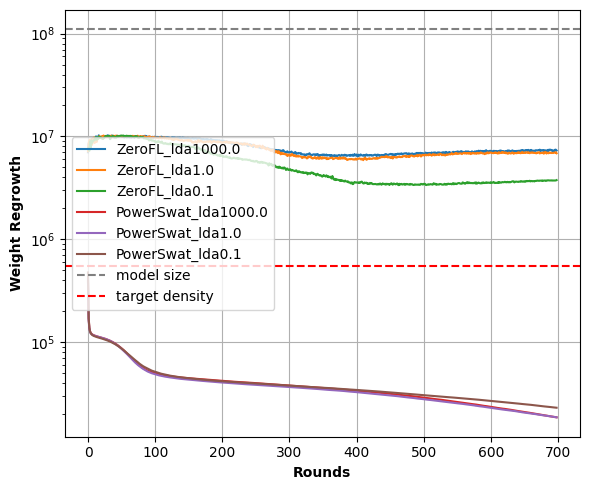

In [12]:
plt.figure(figsize=(6, 5))
for column in weight_regrowth.columns:
    plt.plot(weight_regrowth[column], label=column)
plt.xlabel("Rounds", fontweight="bold")
plt.ylabel("Weight Regrowth", fontweight="bold")
# add a orizontal line at 11 milion
plt.axhline(y=110000000, color="grey", linestyle="--", label="model size")
plt.axhline(y=550000, color="r", linestyle="--", label="target density")

plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()